In [14]:
import array
import struct
import os
import wave 
import csv

In [15]:
def read_loaded_file(audio_path):
    # we are to open the .wav file
    wav_file = wave.open(audio_path, "rb")

    # read audio samples from the audio file
    audio_sample = wav_file.readframes(wav_file.getnframes())
    wav_file.close()

    # convert audio samples into an array
    audio_sample = array.array("h", audio_sample)
    return audio_sample

In [16]:
audio_sample = read_loaded_file("/home/ix502iv/Documents/Audio_Trad/DTW/Lecture/audio/hello2.wav")

In [17]:
# audio_sample

In [18]:
quantization_level = 16

In [19]:
quant_audio = audio_sample
len(quant_audio)

36409

In [22]:
quant_audio[aud]

128

In [ ]:
a = 2**15/quantization_level
a

In [ ]:
b = 2**15/quantization_level
b

In [ ]:
quant_audio[aud]/a

In [21]:
for aud in range(len(quant_audio)):
    quant_audio[aud] = int((quant_audio[aud]/(2**15/quantization_level)) * (2**15/quantization_level))

    # int(quant_audio[aud]/(2**15/quantization_level)) * (2**15/quantization_level)

encod_audio = struct.pack("h"*len(quant_audio), *quant_audio)
# encod_audio

In [23]:
with open("encoded_output.csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    for enc_aud in encod_audio:
        writer.writerow([enc_aud])

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pydub import AudioSegment

encoded_output = pd.read_csv('./encoded_output.csv', header=None)
encoded_output

,0
0,81
1,0
2,64
3,0
4,76
...,...
72813,0
72814,128
72815,0
72816,128


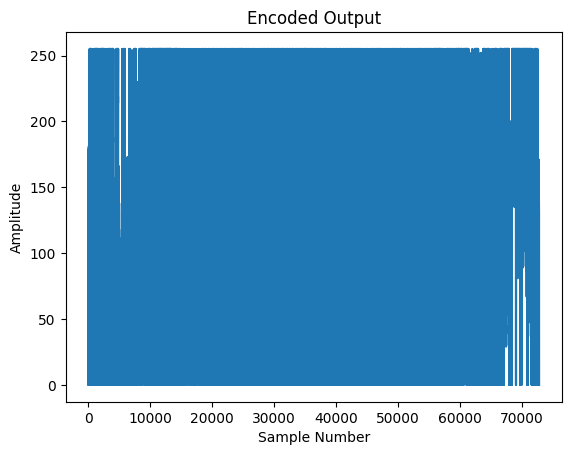

In [25]:
# plot the encoded output

plt.plot(encoded_output)
# plt.plot(audio_sample)
plt.title('Encoded Output')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.show()

In [26]:
# convert the csv data into an array
array_audio = encoded_output.to_numpy()
array_audio

array([[ 81],
       [  0],
       [ 64],
       ...,
       [  0],
       [128],
       [  0]])

* the `audio_sample` is already in an array format before saving it into csv file

In [43]:
# convert byte data -encod_audio- into a numpy array
import numpy as np
byt_arr = np.array(np.frombuffer(encod_audio, dtype="int16")) # precision - noise.
byt_arr


array([ 81,  64,  76, ..., 129, 128, 128], dtype=int16)

In [44]:
import IPython.display as ipyd
ipyd.Audio(rate=32000, data=byt_arr) # sampling rate - pitch.